In [1]:

!pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Show first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape  # Rows and columns

df.info()  # Column types and null values

df.describe()  # Summary stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Text(0.5, 1.0, 'Missing Data Heatmap')

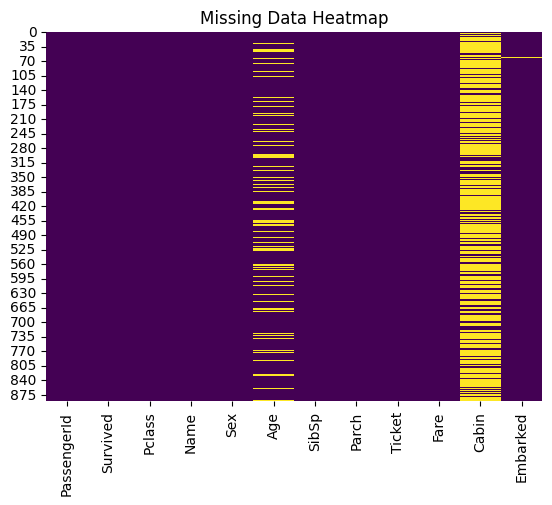

In [4]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")


Text(0.5, 1.0, 'Survival Count')

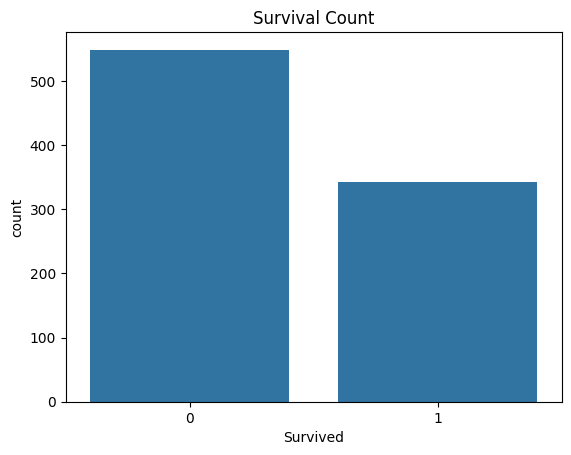

In [5]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')


Text(0.5, 1.0, 'Passenger Class Distribution')

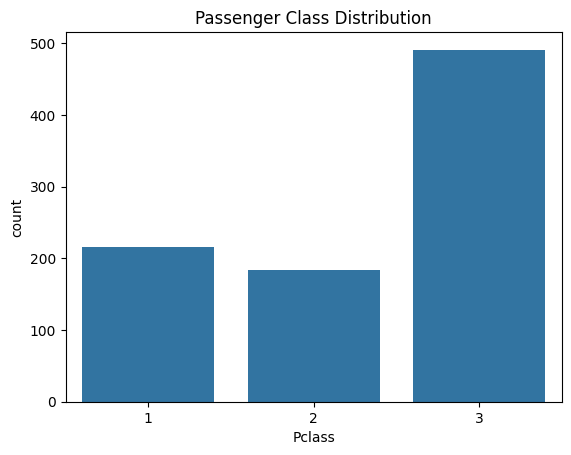

In [6]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')


Text(0.5, 1.0, 'Gender Distribution')

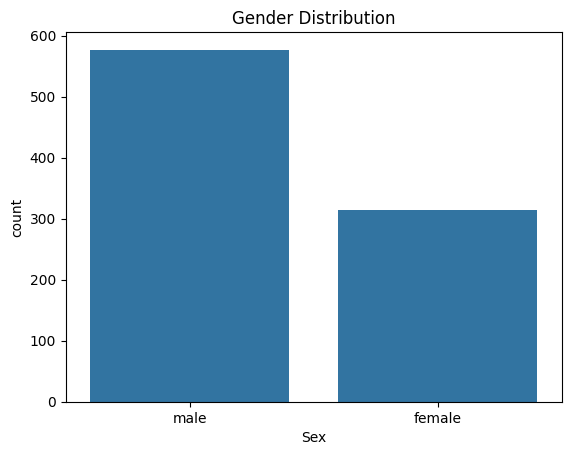

In [7]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')


Text(0.5, 1.0, 'Age Distribution')

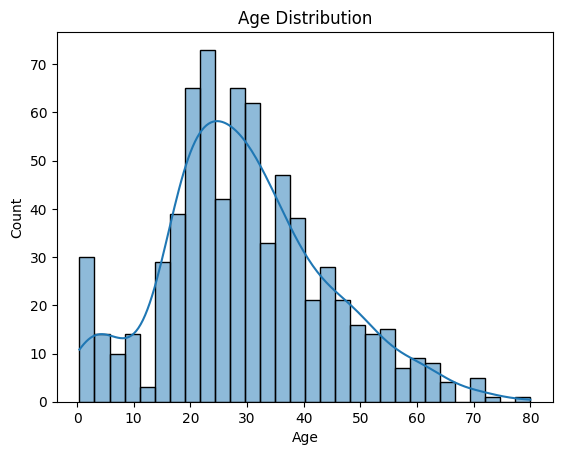

In [8]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')


Text(0.5, 1.0, 'Fare Boxplot')

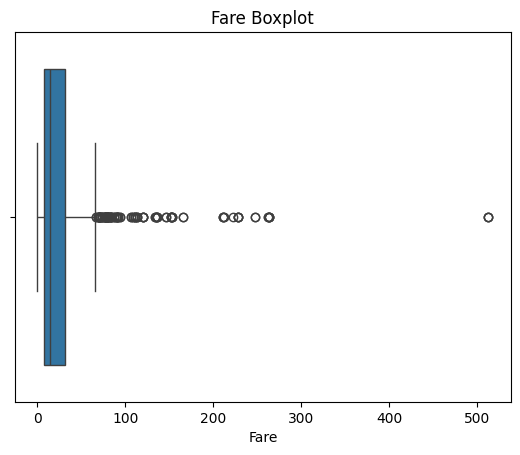

In [9]:
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')


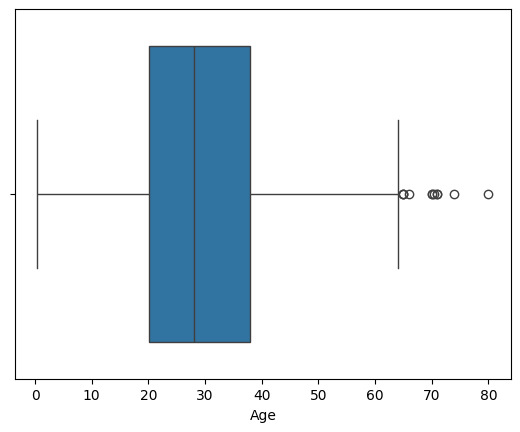

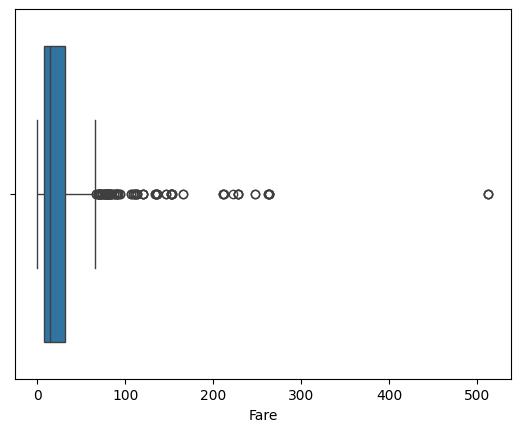

In [11]:
# Check outliers in Age and Fare
sns.boxplot(x='Age', data=df)
plt.show()

sns.boxplot(x='Fare', data=df)
plt.show()


Text(0.5, 1.0, 'Survival by Gender')

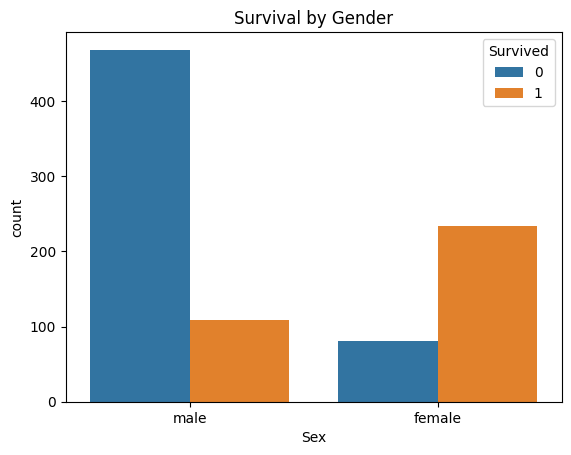

In [12]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')


Text(0.5, 1.0, 'Survival by Passenger Class')

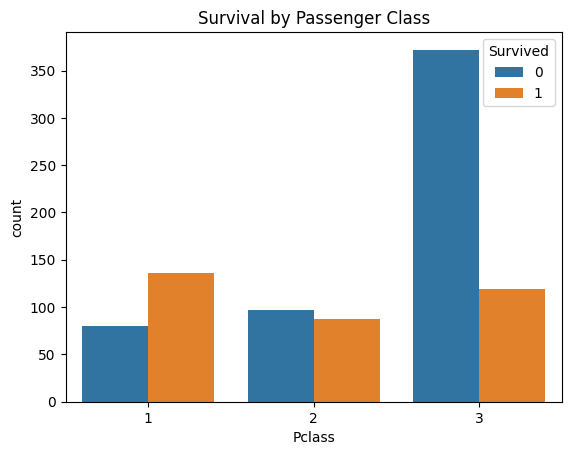

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')


Text(0.5, 1.0, 'Age vs Survival')

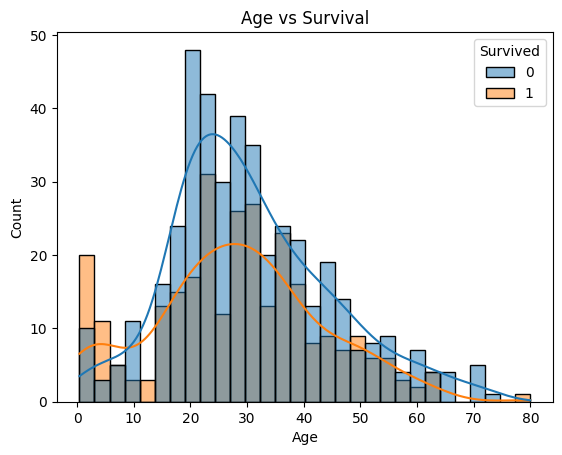

In [14]:
sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True)
plt.title('Age vs Survival')


Text(0.5, 1.0, 'Survival by Fare')

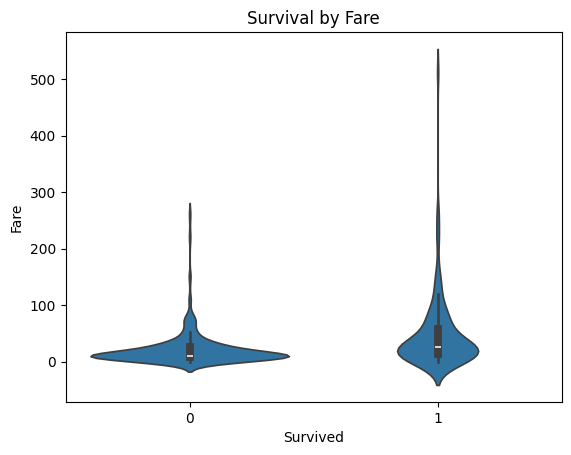

In [15]:
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Survival by Fare')


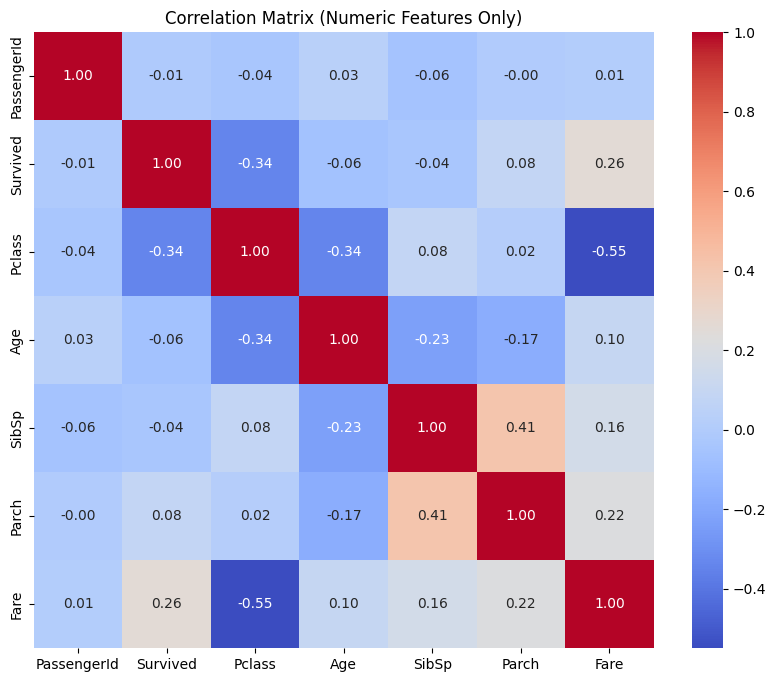

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


In [32]:
# Step 8: Handle missing values safely

# Fill Age if still in df
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked only if it exists
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin only if it exists
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)


In [35]:
# Encode only if the columns exist
encode_cols = [col for col in ['Sex', 'Embarked'] if col in df.columns]

if encode_cols:
    df = pd.get_dummies(df, columns=encode_cols, drop_first=True)
else:
    print("Columns already encoded or missing:", encode_cols)


Columns already encoded or missing: []


In [36]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [37]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 65.4+ KB


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [39]:
df.to_csv('titanic_cleaned.csv', index=False)
